In [8]:
!pip uninstall -y numpy
!pip install numpy==1.23.5
!pip install -q scikit-learn pandas matplotlib seaborn tensorflow


Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have n

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 16.1 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

# DNA base generation
bases = ['A', 'T', 'C', 'G']
ref_genome = ''.join(np.random.choice(bases, 1_000_000))

# Generate 5000 synthetic variants
variants = []
for _ in range(5000):
    pos = np.random.randint(100, len(ref_genome) - 100)
    ref = ref_genome[pos]
    alt = np.random.choice([b for b in bases if b != ref])
    label = np.random.choice([0, 1], p=[0.8, 0.2])  # 0=benign, 1=functional
    context = ref_genome[pos - 50: pos + 51]  # 101 bp window
    mutated = context[:50] + alt + context[51:]
    variants.append([pos, ref, alt, context, mutated, label])

df = pd.DataFrame(variants, columns=["Position", "Ref", "Alt", "Context", "Mutated", "Label"])
df.head()


,Position,Ref,Alt,Context,Mutated,Label
0,162708,G,C,ATCTATGTCTCTGGTAACCACATCTACCCCTCCGCCGATAGGTCCA...,ATCTATGTCTCTGGTAACCACATCTACCCCTCCGCCGATAGGTCCA...,0
1,612730,A,T,ACGTGTCGAGTTAGTTGGCGGGAGGCCCTCAAGAAGCGCATGTACG...,ACGTGTCGAGTTAGTTGGCGGGAGGCCCTCAAGAAGCGCATGTACG...,1
2,272776,T,C,TCATAAAACCGGATTTTCGCATGGACTTTCGACGTGAAGTACACTA...,TCATAAAACCGGATTTTCGCATGGACTTTCGACGTGAAGTACACTA...,0
3,216265,C,A,TGAGCCGCACCAGCGTATCTGAAAACGCAGCTGGTATGTTATAGCT...,TGAGCCGCACCAGCGTATCTGAAAACGCAGCTGGTATGTTATAGCT...,0
4,605480,A,C,ACCCCCACTCACTAACGGAGCTTACCGCAGTCACTCGAGGTGCAGA...,ACCCCCACTCACTAACGGAGCTTACCGCAGTCACTCGAGGTGCAGA...,0


In [2]:
def generate_kmers(seq, k=6):
    return [seq[i:i+k] for i in range(len(seq) - k + 1)]

df["Kmers"] = df["Mutated"].apply(lambda x: generate_kmers(x, k=6))

# Build vocabulary
all_kmers = [kmer for kmers in df["Kmers"] for kmer in kmers]
unique_kmers = sorted(set(all_kmers))
kmer2idx = {k: i+1 for i, k in enumerate(unique_kmers)}  # 0 = padding

# Convert to integer IDs
df["KmerIDs"] = df["Kmers"].apply(lambda kmers: [kmer2idx[k] for k in kmers])
df.head()


,Position,Ref,Alt,Context,Mutated,Label,Kmers,KmerIDs
0,162708,G,C,ATCTATGTCTCTGGTAACCACATCTACCCCTCCGCCGATAGGTCCA...,ATCTATGTCTCTGGTAACCACATCTACCCCTCCGCCGATAGGTCCA...,0,"[ATCTAT, TCTATG, CTATGT, TATGTC, ATGTCT, TGTCT...","[884, 3535, 1852, 3310, 952, 3806, 2936, 3551,..."
1,612730,A,T,ACGTGTCGAGTTAGTTGGCGGGAGGCCCTCAAGAAGCGCATGTACG...,ACGTGTCGAGTTAGTTGGCGGGAGGCCCTCAAGAAGCGCATGTACG...,1,"[ACGTGT, CGTGTC, GTGTCG, TGTCGA, GTCGAG, TCGAG...","[444, 1774, 2999, 3801, 2915, 3468, 1584, 2237..."
2,272776,T,C,TCATAAAACCGGATTTTCGCATGGACTTTCGACGTGAAGTACACTA...,TCATAAAACCGGATTTTCGCATGGACTTTCGACGTGAAGTACACTA...,0,"[TCATAA, CATAAA, ATAAAA, TAAAAC, AAAACC, AAACC...","[3377, 1217, 769, 3074, 6, 23, 91, 361, 1444, ..."
3,216265,C,A,TGAGCCGCACCAGCGTATCTGAAAACGCAGCTGGTATGTTATAGCT...,TGAGCCGCACCAGCGTATCTGAAAACGCAGCTGGTATGTTATAGCT...,0,"[TGAGCC, GAGCCG, AGCCGC, GCCGCA, CCGCAC, CGCAC...","[3622, 2199, 602, 2405, 1426, 1606, 2325, 1107..."
4,605480,A,C,ACCCCCACTCACTAACGGAGCTTACCGCAGTCACTCGAGGTGCAGA...,ACCCCCACTCACTAACGGAGCTTACCGCAGTCACTCGAGGTGCAGA...,0,"[ACCCCC, CCCCCA, CCCCAC, CCCACT, CCACTC, CACTC...","[342, 1365, 1362, 1352, 1310, 1141, 466, 1864,..."


from matplotlib import pyplot as plt
_df_0['Position'].plot(kind='hist', bins=20, title='Position')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Label'].plot(kind='hist', bins=20, title='Label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Ref').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Alt').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Context').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Mutated').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Position', y='Label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Position'].plot(kind='line', figsize=(8, 4), title='Position')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Label'].plot(kind='line', figsize=(8, 4), title='Label')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Alt'].value_counts()
    for x_label, grp in _df_9.groupby('Ref')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Ref')
_ = plt.ylabel('Alt')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Context'].value_counts()
    for x_label, grp in _df_10.groupby('Alt')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Alt')
_ = plt.ylabel('Context')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Mutated'].value_counts()
    for x_label, grp in _df_11.groupby('Context')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Context')
_ = plt.ylabel('Mutated')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Ref'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='Position', y='Ref', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Alt'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Position', y='Alt', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Context'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Position', y='Context', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Mutated'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Position', y='Mutated', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

X = pad_sequences(df["KmerIDs"], maxlen=96, padding='post')
y = df["Label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((4000, 96), (1000, 96))

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

vocab_size = len(kmer2idx) + 1

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=96),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=64
)


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 274ms/step - accuracy: 0.7761 - loss: 0.5862 - val_accuracy: 0.7850 - val_loss: 0.5288
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 251ms/step - accuracy: 0.8135 - loss: 0.4552 - val_accuracy: 0.7400 - val_loss: 0.5626
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 263ms/step - accuracy: 0.9041 - loss: 0.2645 - val_accuracy: 0.7050 - val_loss: 0.7357
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 253ms/step - accuracy: 0.9765 - loss: 0.0920 - val_accuracy: 0.6990 - val_loss: 1.2262
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 254ms/step - accuracy: 0.9970 - loss: 0.0175 - val_accuracy: 0.6770 - val_loss: 1.4309


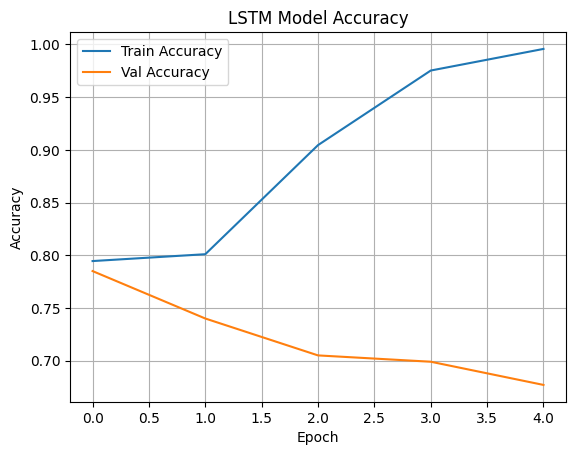

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("LSTM Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       785
           1       0.19      0.16      0.17       215

    accuracy                           0.68      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.65      0.68      0.66      1000

AUC Score: 0.5307421122796622


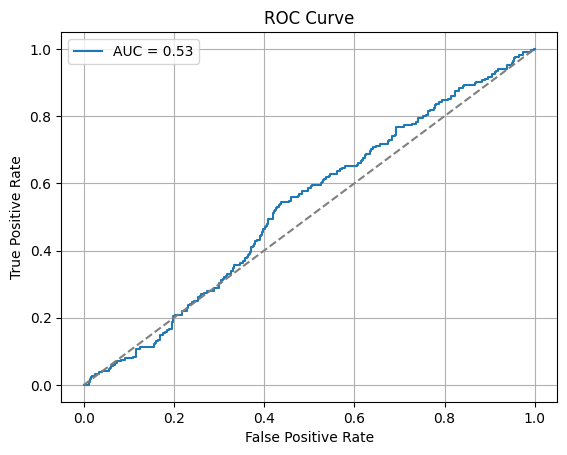

In [7]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

y_prob = model.predict(X_test).flatten()
y_pred = (y_prob > 0.5).astype(int)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_prob))

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
